In [44]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [39]:
enb12 = pd.read_csv('ENB2012_data.csv')
enb12.head()
enb12['X1'] = pd.to_numeric(enb12['X1'], errors='coerce')
enb12['X2'] = pd.to_numeric(enb12['X2'], errors='coerce')
enb12['X3'] = pd.to_numeric(enb12['X3'], errors='coerce')
enb12['X4'] = pd.to_numeric(enb12['X4'], errors='coerce')
enb12['X5'] = pd.to_numeric(enb12['X5'], errors='coerce')
enb12['X6'] = pd.to_numeric(enb12['X6'], errors='coerce')
enb12['X7'] = pd.to_numeric(enb12['X7'], errors='coerce')
enb12['X8'] = pd.to_numeric(enb12['X8'], errors='coerce')
enb12['Y1'] = pd.to_numeric(enb12['Y1'], errors='coerce')
enb12['Y2'] = pd.to_numeric(enb12['Y2'], errors='coerce')

enb12 = enb12.dropna()
print (enb12.head())

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


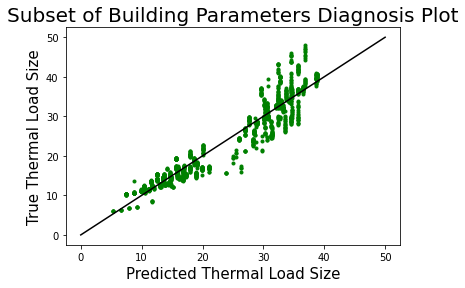

Subset of Building Parameters Accuracy: Y1    89.18
Y2    90.21
dtype: float64 %.
Subset of Building Parameters MSE:
Y1     9.060731
Y2    10.693768
dtype: float64


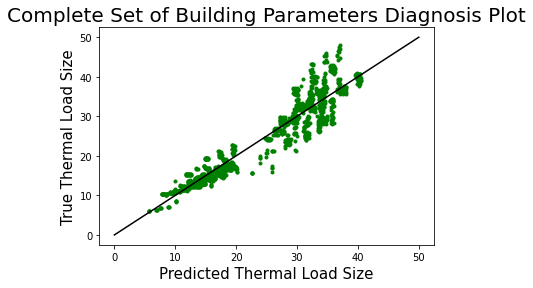

Complete Set of Building Parameters Accuracy: Y1    90.26
Y2    91.09
dtype: float64 %.
Complete Set of Building Parameters MSE:
Y1     8.511172
Y2    10.143109
dtype: float64
Feature: 0, Score: 0.31145
Feature: 1, Score: 0.14854
Feature: 2, Score: 0.46896
Feature: 3, Score: 0.07104


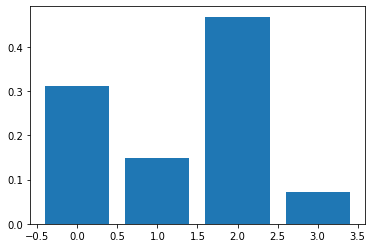

In [50]:
def run_energyload_regression(df, X, regression_name):

    Y = enb12[['Y1', 'Y2']]
    
    reg = LinearRegression()
    reg.fit(X, Y)
    reg.coef_, reg.intercept_
    
    y_pred = reg.predict(X)
    
    # Diagnosis plot
    plt.plot(y_pred, Y, '.g')
    plt.plot([0, 50], [0, 50], 'k')
    plt.xlabel('Predicted Thermal Load Size', size = 15)
    plt.ylabel('True Thermal Load Size', size = 15)
    plt.title(regression_name + ' Diagnosis Plot', size = 20)
    plt.show()
    
    # Calculate the absolute errors
    errors = abs(y_pred - Y)
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / Y)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print(regression_name + ' Accuracy:', round(accuracy, 2), '%.')
    
    # Calculate mean squared error
    mse = np.mean((Y - y_pred)**2)
    print(regression_name + ' MSE:')
    print(mse)
    
    importance = reg.coef_
    
    return reg

X_subset = enb12[['X2', 'X4','X5', 'X7']]
run_energyload_regression(enb12, X_subset, 'Subset of Building Parameters')

X_full = enb12[['X1', 'X2', 'X3', 'X4','X5','X6', 'X7','X8']]
run_energyload_regression(enb12, X_full, 'Complete Set of Building Parameters')

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Mean Absolute Error: Y1    0.35
Y2    1.11
dtype: float64 years.
 Accuracy: Y1    98.45
Y2    96.26
dtype: float64 %.
 MSE:
Y1    0.219842
Y2    2.951087
dtype: float64
 Accuracy: Y1    98.45
Y2    96.26
dtype: float64 %.


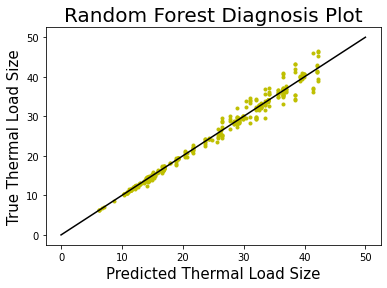

Feature: 0, Score: 0.31145
Feature: 1, Score: 0.14854
Feature: 2, Score: 0.46896
Feature: 3, Score: 0.07104


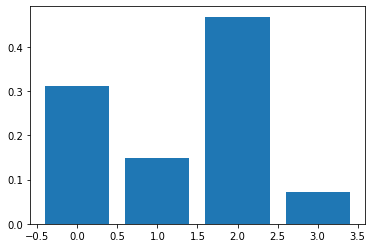

In [47]:
y = enb12[['Y1', 'Y2']]
X = enb12[['X2', 'X4','X5', 'X7']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'years.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print(' Accuracy:', round(accuracy, 2), '%.')
    
# Calculate mean squared error
mse = np.mean((y_test - predictions)**2)
print(' MSE:')
print(mse)

# Calculate and display recall

print(' Accuracy:', round(accuracy, 2), '%.')

# Diagnosis plot
plt.plot(predictions, y_test, '.y')
plt.plot([0, 50], [0, 50], 'k')
plt.xlabel('Predicted Thermal Load Size', size = 15)
plt.ylabel('True Thermal Load Size', size = 15)
plt.title('Random Forest Diagnosis Plot', size = 20)
plt.show()

importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

